#Бинарная сегментация избражений
---
*Водяный Михаил, РИМ-281228*

In [0]:
import numpy as np
import os
from PIL import Image
import torch
import torchvision
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (13,8)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive/train"

images	masks


In [0]:
path = '/content/drive/My Drive/train'
os.listdir(path)

['masks', 'images']

In [0]:
for folder in os.listdir(path):
    pathes = []
    for pth, dirs, files in os.walk(os.path.join(path, folder)):
        for file in files:
            pathes.append(os.path.join(pth, file))
    if folder == 'images':
        img_pathes = pathes
    elif folder == 'masks':
        lbl_pathes = pathes
        
img_pathes.sort()
lbl_pathes.sort()

In [0]:
import torch
from torch.utils import data

T = transforms.Compose([
    transforms.Resize([224,224]),
    transforms.ToTensor(),
])

class Dataset(data.Dataset):
    def __init__(self, path, subset = 'train', transform = None):

        for folder in os.listdir(path):
            pathes = []
            for pth, dirs, files in os.walk(os.path.join(path, folder)):
                for file in files:
                    pathes.append(os.path.join(pth, file))
            if folder == 'images':
                img_pathes = pathes
            elif folder == 'masks':
                lbl_pathes = pathes
   
        img_pathes.sort()
        lbl_pathes.sort()
        
        items = list(zip(img_pathes, lbl_pathes))
        
        if subset == 'train':
            self.items = items[: int(.7 * len(items))]
        elif subset == 'valid':
            self.items = items[int(.7 * len(items)): int(.9 * len(items))]
        elif subset == 'test':
            self.items = items[int(.9 * len(items)):]
            
        self.transform = transform

    def __len__(self):
        return len(self.items)

    def __getitem__(self, index):
        img_name, msk_name = self.items[index]

        image = Image.open(img_name)
        mask = Image.open(msk_name).convert('L')

        
        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)
        
        return image, mask

In [0]:
data = Dataset(path, subset='train', transform=None)

In [0]:
img, msk = data[60]

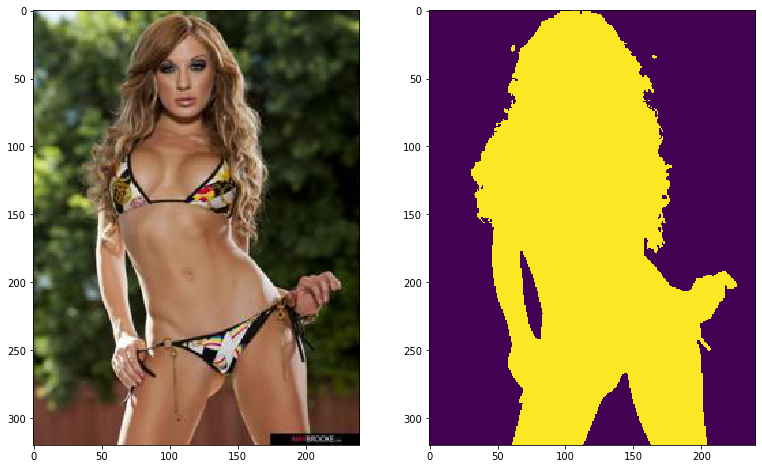

In [0]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(img)
axs[1].imshow(msk)

In [0]:
train_data = Dataset(path, subset='train', transform=T)
valid_data = Dataset(path, subset='valid', transform=T)
test_data = Dataset(path, subset='test', transform=T)

In [0]:

train_loader = torch.utils.data.DataLoader(train_data, 
                                           batch_size=16, 
                                           shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, 
                                           batch_size=16, 
                                           shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, 
                                           batch_size=1, 
                                           shuffle=False)

In [0]:
model_labels = ['resnet18', 'resnet34', 'resnet50', 'dpn68', 'dpn98', 'vgg13']

In [0]:
pip install git+https://github.com/qubvel/segmentation_models

  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-s54qyug_
  Running command git clone -q https://github.com/qubvel/segmentation_models /tmp/pip-req-build-s54qyug_
  Running command git submodule update --init --recursive -q
  Created wheel for segmentation-models: filename=segmentation_models-1.0.0-cp36-none-any.whl size=33585 sha256=1d9e5e46f2d888d27c19643c26270cf466f9b0f35fc1cb56778e2db51ece3131
  Stored in directory: /tmp/pip-ephem-wheel-cache-6s97u3jp/wheels/49/cf/46/cbb4bb64518c402aea99df9d466f1081450597e653256bbcf4
Successfully built segmentation-models


In [0]:
#import segmentation_models_pytorch as smp
from torch import nn

Encoder: resnet18
Функция ошибки бинарная кроссэнтропия

Epoch: 1
valid: 100%|██████████| 19/19 [00:02<00:00,  8.79it/s, bce_loss - 0.188, iou_score - 0.9139, fscore - 0.9549]

Epoch: 2
valid: 100%|██████████| 19/19 [00:02<00:00,  8.74it/s, bce_loss - 0.1668, iou_score - 0.9157, fscore - 0.956]

Epoch: 3
valid: 100%|██████████| 19/19 [00:02<00:00,  9.10it/s, bce_loss - 0.1489, iou_score - 0.9302, fscore - 0.9638]

Epoch: 4
valid: 100%|██████████| 19/19 [00:02<00:00,  8.83it/s, bce_loss - 0.1499, iou_score - 0.9404, fscore - 0.9692]

Epoch: 5
valid: 100%|██████████| 19/19 [00:02<00:00,  8.61it/s, bce_loss - 0.1287, iou_score - 0.9425, fscore - 0.9704]

Epoch: 6
valid: 100%|██████████| 19/19 [00:02<00:00,  8.79it/s, bce_loss - 0.1183, iou_score - 0.9385, fscore - 0.9682]
Decrease decoder learning rate to 1e-5!

Epoch: 7
valid: 100%|██████████| 19/19 [00:02<00:00,  8.32it/s, bce_loss - 0.1122, iou_score - 0.9411, fscore - 0.9696]

Epoch: 8
valid: 100%|██████████| 19/19 [00:02<00:00,  8.82

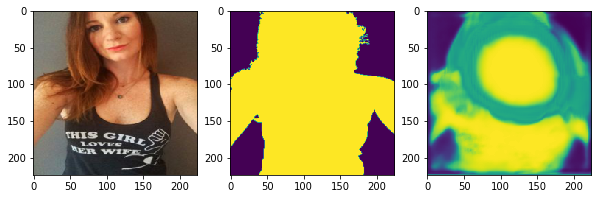

Encoder: resnet34
Функция ошибки бинарная кроссэнтропия

Epoch: 1
valid: 100%|██████████| 19/19 [00:02<00:00,  8.40it/s, bce_loss - 0.1928, iou_score - 0.892, fscore - 0.9428]

Epoch: 2
valid: 100%|██████████| 19/19 [00:02<00:00,  8.51it/s, bce_loss - 0.1654, iou_score - 0.9097, fscore - 0.9526]

Epoch: 3
valid: 100%|██████████| 19/19 [00:02<00:00,  8.26it/s, bce_loss - 0.142, iou_score - 0.9288, fscore - 0.963]

Epoch: 4
valid: 100%|██████████| 19/19 [00:02<00:00,  8.48it/s, bce_loss - 0.1202, iou_score - 0.9475, fscore - 0.973]

Epoch: 5
valid: 100%|██████████| 19/19 [00:02<00:00,  8.36it/s, bce_loss - 0.1176, iou_score - 0.9467, fscore - 0.9726]

Epoch: 6
valid: 100%|██████████| 19/19 [00:02<00:00,  8.30it/s, bce_loss - 0.1082, iou_score - 0.9488, fscore - 0.9737]
Decrease decoder learning rate to 1e-5!

Epoch: 7
valid: 100%|██████████| 19/19 [00:02<00:00,  8.53it/s, bce_loss - 0.1067, iou_score - 0.9493, fscore - 0.974]

Epoch: 8
valid: 100%|██████████| 19/19 [00:02<00:00,  8.38it/

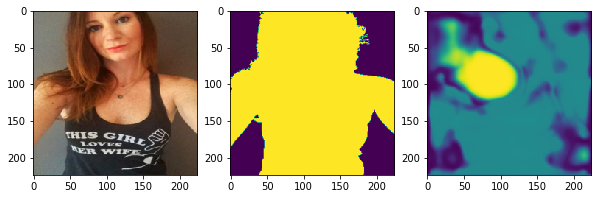

Encoder: resnet50
Функция ошибки бинарная кроссэнтропия

Epoch: 1
valid: 100%|██████████| 19/19 [00:02<00:00,  7.38it/s, bce_loss - 0.2264, iou_score - 0.8924, fscore - 0.9431]

Epoch: 2
valid: 100%|██████████| 19/19 [00:02<00:00,  7.56it/s, bce_loss - 0.2024, iou_score - 0.9113, fscore - 0.9535]

Epoch: 3
valid: 100%|██████████| 19/19 [00:02<00:00,  7.45it/s, bce_loss - 0.1795, iou_score - 0.9259, fscore - 0.9615]

Epoch: 4
valid: 100%|██████████| 19/19 [00:02<00:00,  7.40it/s, bce_loss - 0.1578, iou_score - 0.9415, fscore - 0.9698]

Epoch: 5
valid: 100%|██████████| 19/19 [00:02<00:00,  7.52it/s, bce_loss - 0.1498, iou_score - 0.9393, fscore - 0.9687]

Epoch: 6
valid: 100%|██████████| 19/19 [00:02<00:00,  7.52it/s, bce_loss - 0.1347, iou_score - 0.9478, fscore - 0.9732]
Decrease decoder learning rate to 1e-5!

Epoch: 7
valid: 100%|██████████| 19/19 [00:02<00:00,  7.51it/s, bce_loss - 0.1364, iou_score - 0.9501, fscore - 0.9744]

Epoch: 8
valid: 100%|██████████| 19/19 [00:02<00:00,  7.

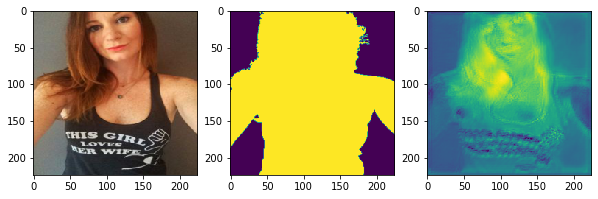

Encoder: dpn68
Функция ошибки бинарная кроссэнтропия

Epoch: 1
valid: 100%|██████████| 19/19 [00:02<00:00,  7.08it/s, bce_loss - 0.2067, iou_score - 0.8548, fscore - 0.9215]

Epoch: 2
valid: 100%|██████████| 19/19 [00:02<00:00,  7.08it/s, bce_loss - 0.1579, iou_score - 0.9109, fscore - 0.9533]

Epoch: 3
valid: 100%|██████████| 19/19 [00:02<00:00,  7.12it/s, bce_loss - 0.1344, iou_score - 0.9328, fscore - 0.9652]

Epoch: 4
valid: 100%|██████████| 19/19 [00:02<00:00,  7.10it/s, bce_loss - 0.1238, iou_score - 0.9418, fscore - 0.97]

Epoch: 5
valid: 100%|██████████| 19/19 [00:02<00:00,  7.24it/s, bce_loss - 0.1177, iou_score - 0.9347, fscore - 0.9662]

Epoch: 6
valid: 100%|██████████| 19/19 [00:02<00:00,  7.28it/s, bce_loss - 0.1009, iou_score - 0.9478, fscore - 0.9732]
Decrease decoder learning rate to 1e-5!

Epoch: 7
valid: 100%|██████████| 19/19 [00:02<00:00,  7.15it/s, bce_loss - 0.0989, iou_score - 0.9505, fscore - 0.9746]

Epoch: 8
valid: 100%|██████████| 19/19 [00:02<00:00,  6.57it/

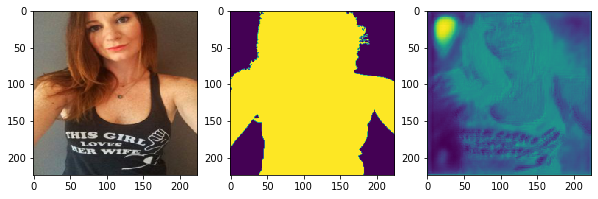

Encoder: dpn98
Функция ошибки бинарная кроссэнтропия


Downloading: "http://data.lip6.fr/cadene/pretrainedmodels/dpn98-722954780.pth" to /root/.cache/torch/checkpoints/dpn98-722954780.pth
100%|██████████| 236M/236M [11:34<00:00, 356kB/s]



Epoch: 1
valid: 100%|██████████| 19/19 [00:04<00:00,  4.47it/s, bce_loss - 0.1762, iou_score - 0.8634, fscore - 0.9265]

Epoch: 2
valid: 100%|██████████| 19/19 [00:04<00:00,  4.45it/s, bce_loss - 0.1351, iou_score - 0.9376, fscore - 0.9678]

Epoch: 3
valid: 100%|██████████| 19/19 [00:04<00:00,  4.48it/s, bce_loss - 0.1606, iou_score - 0.8807, fscore - 0.9364]

Epoch: 4
valid: 100%|██████████| 19/19 [00:04<00:00,  4.51it/s, bce_loss - 0.09768, iou_score - 0.9372, fscore - 0.9675]

Epoch: 5
valid: 100%|██████████| 19/19 [00:04<00:00,  4.56it/s, bce_loss - 0.1493, iou_score - 0.9345, fscore - 0.966]

Epoch: 6
valid: 100%|██████████| 19/19 [00:04<00:00,  4.54it/s, bce_loss - 0.08159, iou_score - 0.9512, fscore - 0.975]
Decrease decoder learning rate to 1e-5!

Epoch: 7
valid: 100%|██████████| 19/19 [00:04<00:00,  4.52it/s, bce_loss - 0.08158, iou_score - 0.9552, fscore - 0.9771]

Epoch: 8
valid: 100%|██████████| 19/19 [00:04<00:00,  4.46it/s, bce_loss - 0.08122, iou_score - 0.9565, fscore 

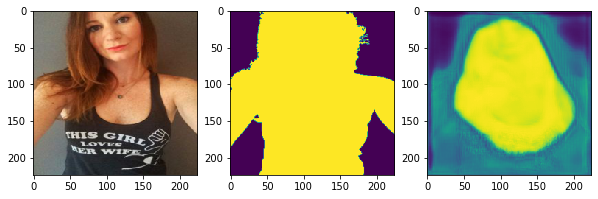

Encoder: vgg13
Функция ошибки бинарная кроссэнтропия


Downloading: "https://download.pytorch.org/models/vgg13-c768596a.pth" to /root/.cache/torch/checkpoints/vgg13-c768596a.pth
100%|██████████| 508M/508M [00:21<00:00, 24.9MB/s]



Epoch: 1
valid: 100%|██████████| 19/19 [00:02<00:00,  7.63it/s, bce_loss - 0.2154, iou_score - 0.908, fscore - 0.9518]

Epoch: 2
valid: 100%|██████████| 19/19 [00:02<00:00,  7.39it/s, bce_loss - 0.2144, iou_score - 0.8992, fscore - 0.9468]

Epoch: 3
valid: 100%|██████████| 19/19 [00:02<00:00,  7.18it/s, bce_loss - 0.1893, iou_score - 0.9284, fscore - 0.9628]

Epoch: 4
valid: 100%|██████████| 19/19 [00:02<00:00,  7.50it/s, bce_loss - 0.1771, iou_score - 0.9374, fscore - 0.9676]

Epoch: 5
valid: 100%|██████████| 19/19 [00:02<00:00,  6.94it/s, bce_loss - 0.1682, iou_score - 0.9394, fscore - 0.9687]

Epoch: 6
valid: 100%|██████████| 19/19 [00:02<00:00,  7.41it/s, bce_loss - 0.1828, iou_score - 0.9148, fscore - 0.9555]
Decrease decoder learning rate to 1e-5!

Epoch: 7
valid: 100%|██████████| 19/19 [00:02<00:00,  7.08it/s, bce_loss - 0.1592, iou_score - 0.9409, fscore - 0.9695]

Epoch: 8
valid: 100%|██████████| 19/19 [00:02<00:00,  7.04it/s, bce_loss - 0.1564, iou_score - 0.9417, fscore - 0

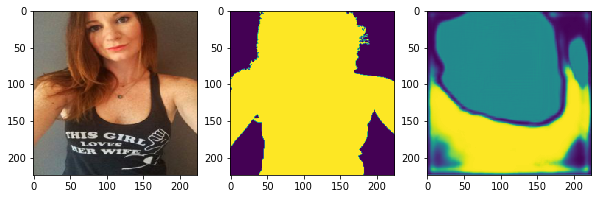

In [0]:
for model_name in model_labels:
    
    print("Encoder: " + str(model_name))
    
    print("Функция ошибки бинарная кроссэнтропия")
            
    model = smp.Unet(model_name).to(device)
            
    loss = nn.BCEWithLogitsLoss()
    loss.__name__ = 'bce_loss'
    metrics = [
        smp.utils.metrics.IoU(eps=1.),
        smp.utils.metrics.Fscore(eps=1.),
    ]

    optimizer = torch.optim.Adam([
        {'params': model.decoder.parameters(), 'lr': 1e-3},     

        {'params': model.encoder.parameters(), 'lr': 1e-5},  
    ])
            
    train_epoch = smp.utils.train.TrainEpoch(
        model, 
        loss=loss, 
        metrics=metrics, 
        optimizer=optimizer,
        device=device,
        verbose=True,
    )

    valid_epoch = smp.utils.train.ValidEpoch(
        model, 
        loss=loss, 
        metrics=metrics, 
        device=device,
        verbose=True,
    )
            
    max_score = 0

    #эпохи  
    for i in range(0, 20):

        print('\nEpoch: {}'.format(i + 1))
        train_logs = train_epoch.run(train_loader)
        valid_logs = valid_epoch.run(valid_loader)

        # do something (save model, change lr, etc.)
    #     if max_score < valid_logs['iou']:
    #         max_score = valid_logs['iou']
    #         torch.save(model, './best_model.pth')
    #         print('Model saved!')

        if i == 5:
            optimizer.param_groups[0]['lr'] = 1e-5
            print('Decrease decoder learning rate to 1e-5!')
            
    valid_epoch.run(test_loader)
            
            
    print("Функция ошибки Dice")
            
    model = smp.Unet().to(device)

    loss = smp.utils.losses.DiceLoss(eps=1.)

    metrics = [
        smp.utils.metrics.IoU(eps=1.),
        smp.utils.metrics.Fscore(eps=1.),
    ]

    optimizer = torch.optim.Adam([
        {'params': model.decoder.parameters(), 'lr': 1e-3},     

        {'params': model.encoder.parameters(), 'lr': 1e-5},  
    ])

    train_epoch = smp.utils.train.TrainEpoch(
        model, 
        loss=loss, 
        metrics=metrics, 
        optimizer=optimizer,
        device=device,
        verbose=True,
    )

    valid_epoch = smp.utils.train.ValidEpoch(
        model, 
        loss=loss, 
        metrics=metrics, 
        device=device,
        verbose=True,
    )
            
    max_score = 0
    #эпохи 
    for i in range(0, 20):

        print('\nEpoch: {}'.format(i+1))
        train_logs = train_epoch.run(train_loader)
        valid_logs = valid_epoch.run(valid_loader)

        # do something (save model, change lr, etc.)
    #     if max_score < valid_logs['iou']:
    #         max_score = valid_logs['iou']
    #         torch.save(model, './best_model.pth')
    #         print('Model saved!')

        if i == 5:
            optimizer.param_groups[0]['lr'] = 1e-5
            print('Decrease decoder learning rate to 1e-5!')
            
    valid_epoch.run(test_loader)
            
            
    print('Визуализация данных')
            
    img, mask_true = test_data[6]
    mask_pred = torch.sigmoid(model(img.unsqueeze(0).to(device)))
            
    plt.figure(figsize=(10,10))
    plt.subplot(131)
    plt.imshow(img.numpy().transpose(1,2,0))
    plt.subplot(132)
    plt.imshow(mask_true.squeeze().numpy())
    plt.subplot(133)
    plt.imshow(mask_pred.squeeze().cpu().detach().numpy())
    plt.show()